1. 编写 Python程序,判断输入a是否为质数

In [207]:
def is_prime(a):
    if a <= 1:
        return False
    for i in range(2, a):
        if a % i == 0:
            return False
    return True

# 测试样例
print(is_prime(16)) 

False


2. 用Python实现插入排序该算法，不允许直接调用插入排序函数，需要手动实现其逻辑过程。

In [208]:
def insert_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

# 测试样例
arr = [12, 100, 13, 99, 32]
insert_sort(arr)
print(arr)

[12, 13, 32, 99, 100]


3. 用Python实现选择排序该算法，不允许直接调用选择排序函数，需要手动实现其逻辑过程

In [209]:
def select_sort(arr):
    for i in range(len(arr)):
        min_index = i
        for j in range(i + 1, len(arr)):
            if arr[j] < arr[min_index]:
                min_index = j
        arr[i], arr[min_index] = arr[min_index], arr[i]

# 测试样例
arr = [12, 100, 13, 99, 32]
select_sort(arr)
print(arr)

[12, 13, 32, 99, 100]


4. 用Python实现快速排序该算法，不允许直接调用快速排序函数，需要手动实现其逻辑过程。

In [210]:
def quick_sort(arr, p = 0, r = len(arr) - 1):
    if p < r:
        q = partition(arr, p, r)
        quick_sort(arr, p, q - 1)
        quick_sort(arr, q + 1, r)

def partition(arr, p, r):
    pivot = arr[r]
    i = p - 1
    for j in range(p, r):
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i + 1], arr[r] = arr[r], arr[i + 1]
    return i + 1

# 测试样例
arr = [12, 100, 13, 99, 32]
quick_sort(arr, 0, len(arr) - 1)
print(arr)

[12, 13, 32, 99, 100]


5. 使用 Python 随机生成三组长度递增的随机数列，长度分别为100、1000、10000，对生成的随机数组使用不同的排序算法，例如选择排序和归并排序，至少三种排序方法。对这些数列的数据排序，并分析不同排序算法在不同长度数列下的运行效果，例如运行时间等指标。（可以使用排序函数）

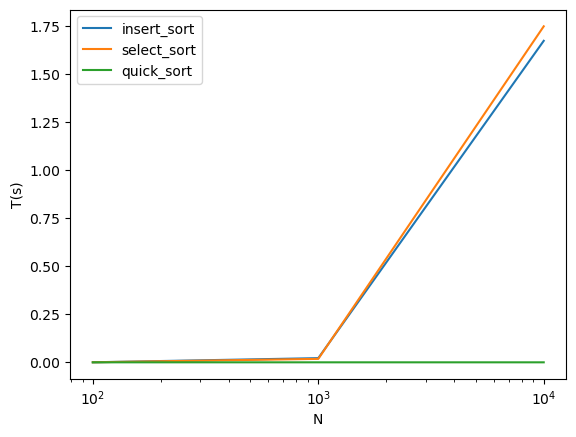

time_insert_sort: [0.0001747000001159904, 0.021713200000249344, 1.6713721000000987]
time_select_sort: [0.0001855000000432483, 0.01790389999996478, 1.7466942000000927]
time_quick_sort: [1.1000000085914508e-05, 4.300000000512227e-06, 3.000000106112566e-06]


In [211]:
# 随机生成三组长度递增的随机数列，长度分别为100、1000、10000，取值范围为0-100000
import random
arr1 = random.sample(range(100000), 100)
arr2 = random.sample(range(100000), 1000)
arr3 = random.sample(range(100000), 10000)

# 分析运行时间
import timeit
import matplotlib.pyplot as plt

def test_sort(f_sort, arr):
    start = timeit.default_timer()
    f_sort(arr)
    end = timeit.default_timer()
    return end - start

time_insert_sort = [test_sort(insert_sort, arr1), test_sort(insert_sort, arr2), test_sort(insert_sort, arr3)]
time_select_sort = [test_sort(select_sort, arr1), test_sort(select_sort, arr2), test_sort(select_sort, arr3)]
time_quick_sort = [test_sort(quick_sort, arr1), test_sort(quick_sort, arr2), test_sort(quick_sort, arr3)]

plt.plot([100, 1000, 10000], time_insert_sort, label='insert_sort')
plt.plot([100, 1000, 10000], time_select_sort, label='select_sort')
plt.plot([100, 1000, 10000], time_quick_sort, label='quick_sort')

plt.xscale('log')
plt.xlabel('N')
plt.ylabel('T(s)')
plt.legend()
plt.show()

print("time_insert_sort: " + str(time_insert_sort))
print("time_select_sort: "+ str(time_select_sort))
print("time_quick_sort: "+ str(time_quick_sort))


6. 使用python代码获取当前系统时间

In [212]:
import time
print(time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time())))


2024-10-22 12:50:31


7. data文件夹下的stuGrade.csv文件中包含5位同学的学号、语文成绩、数学成绩和英语成绩，请先用记事本打开该文件，查看文件内容，然后编写Python程序，读取该文件，并计算出各科的平均成绩（保留2位小数）。

In [213]:
import pandas as pd
df = pd.read_csv('data/stuGrade.csv')
print(df)
print("语文平均成绩：", end = '')
print('{:.2f}'.format(df['chinese'].mean()))
print("数学平均成绩：", end = '')
print('{:.2f}'.format(df['math'].mean()))
print("英语平均成绩：", end = '')
print('{:.2f}'.format(df['english'].mean()))

   stuID  chinese  math  english
0  10381       74    87       82
1  10382       92    88       90
2  10383       87    82       81
3  10384       98    97       96
4  10385       62    51       60
语文平均成绩：82.60
数学平均成绩：81.00
英语平均成绩：81.80


8. 请在第7题的代码继续编写Python程序，将以下内容写入my.txt文件中，一并上传到github中。

    **第1行**：你的学号和姓名

    **第2行**：3门课程的平均成绩（任意课程），保留2位小数，以英文逗号间隔

    **第3行**：系统当前时间，格式例如2020-01-01 12:00:00

    **第4行**：两秒后的系统当前时间（利用sleep()方法）

In [214]:
profile = "10235501419 李佳亮"
avg_grade = "80.00, 81.00, 82.00"

time1 = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())
time.sleep(2)
time2 = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())

with open("my.txt", "w") as file:
    file.write(profile + "\n" + avg_grade + '\n' + time1 + '\n' + time2)